# Start by importing libraries

In [21]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

# Import data

In [66]:
import csv
import pandas as pd
import numpy as np

filename = "Poe_NotPoe_50words.csv"

# read csv
pdf = pd.read_csv(filename, index_col=None)

# edit dataframe
pdf = pdf.drop([0,1])
pdf.rename(columns={'Unnamed: 0' : 'class'}, inplace=True)
pdf.reset_index(inplace=True, drop=True)

# create array of features
features = pdf.columns
features = features[1:]

# create dataframe of features (X)
X = pdf.to_numpy()
X = X[:,1:]

# create count of unique labels/classes (y)
unique_classes = []
for each in pdf['class']:
    if each not in unique_classes and each != "UNKNOWN":
        unique_classes.append(each)

y = len(unique_classes)

# Model Clusters

Text(0, 0.5, 'as')

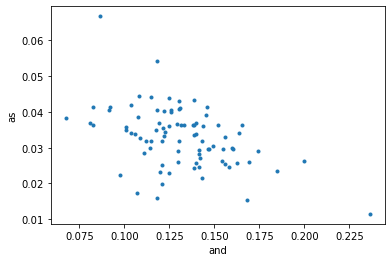

In [67]:
# create random seed
np.random.seed(0)
feature_x = 2
feature_y = 3
plt.scatter(X[:, feature_x], X[:, feature_y], marker='.')
plt.xlabel(features[feature_x])
plt.ylabel(features[feature_y])

# Data Visualization

In [68]:
# locating each variable value in pdf['class'] and assigning it a numerical value
pdf.loc[pdf['class'] == 'NotPoe', 'class'] = 1
pdf.loc[pdf['class'] == 'Poe', 'class'] = 2
# setting unknown to our "guess", so that analysis will give a "right"/"wrong" answer
pdf.loc[pdf['class'] == 'UNKNOWN', 'class'] = 2

# setting the data type of the classes to int
pdf['class'] = pdf['class'].astype('float')

numberOfClusters = 2 # USER SET

k_means = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_


k_means_cluster_centers = k_means.cluster_centers_


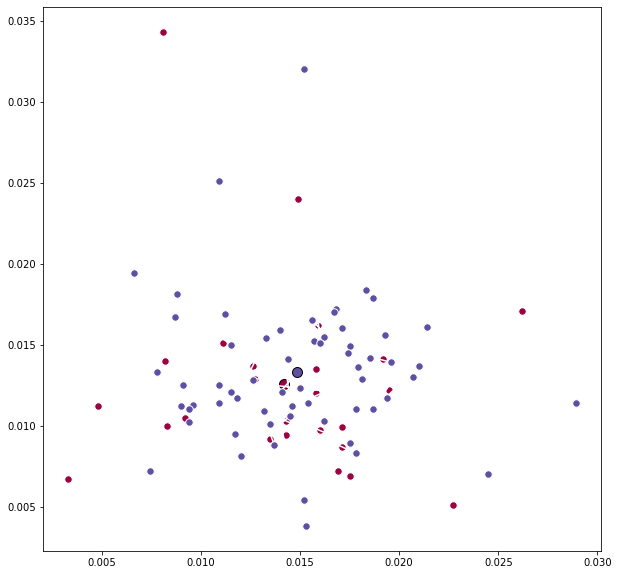

In [69]:
k_means3 = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 40)
k_means3.fit(X)
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
#ax.plot()
plt.show()


# label data points